In [66]:
# Importing all the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import warnings
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split # import the splitting method from sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score # import the score functions 
warnings.filterwarnings('ignore') # suppress warnings

In [67]:
# importing the raw dataset (not as an excel sheet as corrupted)
melb_raw = pd.read_csv("Melbourne01", header = None)

In [68]:
# Need to split the data into columns 
melb_split = melb_raw[0].str.split()
melb_split

0          [2011, 1, 1, 0, 4, 24.8, 0.0, 14.0, 51, SE, 11...
1          [2011, 1, 1, 0, 4, 24.8, 0.0, 14.0, 51, SE, 11...
2          [2011, 1, 1, 0, 14, 24.8, 0.0, 13.3, 48, SE, 1...
3          [2011, 1, 1, 0, 14, 24.8, 0.0, 13.3, 48, SE, 1...
4          [2011, 1, 1, 0, 24, 24.9, 0.0, 13.3, 48, SE, 1...
                                 ...                        
1019649    [2022, 3, 8, 16, 0, 18.9, 17.6, 13.7, 72, SSW,...
1019650    [2022, 3, 8, 16, 0, 18.9, 17.6, 13.7, 72, SSW,...
1019651    [2022, 3, 8, 16, 10, 19.2, 18.3, 13.8, 71, S, ...
1019652    [2022, 3, 8, 16, 10, 19.2, 18.3, 13.8, 71, S, ...
1019653    [2022, 3, 8, 16, 20, 19.2, 17.5, 13.6, 70, S, ...
Name: 0, Length: 1019654, dtype: object

In [69]:
# Dropping rows with 15 columns.
bools = []
for l in range(len(melb_split)):
    length = len(melb_split[l])
    if length == 14:
        bools.append(True)
    else: 
        bools.append(False)

melb_split_cleaned = melb_split[bools]

In [70]:
table = []
for row in melb_split_cleaned.values:
    table.append(row)
melb = pd.DataFrame(table, columns = ["Year", 
                                    "Month",
                                    "Date",
                                    "Hour",
                                    "Minute",
                                    "Dry bulb temperature",
                                    "Dew point temperature",
                                    "Apparent temperature",
                                    "Relative humidity",
                                    "Wind direction",
                                    "Average wind-speed",
                                    "Wind-gust",
                                    "Mean sea level pressure",
                                    "Rainfall"
                                   ]).drop_duplicates().dropna().reset_index().drop(columns=['index'])
# Remove white space.
for column in melb:
    melb[column] = melb[column].str.strip()
melb.head()

,Year,Month,Date,Hour,Minute,Dry bulb temperature,Dew point temperature,Apparent temperature,Relative humidity,Wind direction,Average wind-speed,Wind-gust,Mean sea level pressure,Rainfall
0,2011,1,1,0,4,24.8,0.0,14.0,51,SE,11,13,1007.4,0.0
1,2011,1,1,0,14,24.8,0.0,13.3,48,SE,11,11,1007.5,0.0
2,2011,1,1,0,24,24.9,0.0,13.3,48,SE,11,13,1007.5,0.0
3,2011,1,1,0,34,24.7,0.0,13.4,49,SE,11,11,1007.4,0.0
4,2011,1,1,0,44,24.1,0.0,13.3,51,ESE,9,9,1007.3,0.0


In [71]:
# Creating date-time column
date_time = []
for r in range(len(melb)):
    date_time.append(f"{str(int(melb['Year'][r]))}-{str(int(melb['Month'][r]))}-{str(int(melb['Date'][r]))} {str(int(melb['Hour'][r]))}:{str(int(melb['Minute'][r]))}:00")

melb["Time"] = date_time
melb = melb.set_index(pd.to_datetime(melb["Time"]))
melb.drop(columns = ["Year", "Month", "Date", "Hour", "Minute","Time"], inplace = True)

melb.head()

,Dry bulb temperature,Dew point temperature,Apparent temperature,Relative humidity,Wind direction,Average wind-speed,Wind-gust,Mean sea level pressure,Rainfall
Time,,,,,,,,,
2011-01-01 00:04:00,24.8,0.0,14.0,51,SE,11,13,1007.4,0.0
2011-01-01 00:14:00,24.8,0.0,13.3,48,SE,11,11,1007.5,0.0
2011-01-01 00:24:00,24.9,0.0,13.3,48,SE,11,13,1007.5,0.0
2011-01-01 00:34:00,24.7,0.0,13.4,49,SE,11,11,1007.4,0.0
2011-01-01 00:44:00,24.1,0.0,13.3,51,ESE,9,9,1007.3,0.0


In [72]:
# This also gets rid of columns rows containing "-"
directions = ['SE', 'ESE', 'NE', 'NNE', 'ENE', 'W', 'N', 'SW', 'SSE', 'S', 'SSW','WSW', 'NW', 'WNW', 'NNW', 'E', 'CALM']
bools = []

for r in range(len(melb)):
    if melb["Wind direction"][r] in directions:
        bools.append(True)
    else:
        bools.append(False)

melb = melb[bools]
melb["Wind direction"].unique()

array(['SE', 'ESE', 'NE', 'NNE', 'ENE', 'W', 'N', 'SW', 'SSE', 'S', 'SSW',
       'WSW', 'NW', 'WNW', 'NNW', 'E', 'CALM'], dtype=object)

In [73]:
# Function for removing rows which contain a particular value
def remove_row_if_value(df,column,value):
    bools = []
    length = len(df)
    
    for r in range(length):
        col_value = df[column][r]
        if col_value == value:
            bools.append(False)
        else:
            bools.append(True)
    
    df = df[bools]
    return df

In [74]:
# Removing dashes from rainfall
melb = remove_row_if_value(melb,"Rainfall","-")

In [75]:
for col in melb:
    if col != "Wind direction":
        melb.loc[:,col] = melb.loc[:,col].astype(float)

In [76]:
# Removing values which equal -9999
melb = remove_row_if_value(melb,"Wind-gust",-9999.0)
melb = remove_row_if_value(melb,"Mean sea level pressure",-9999.0)
melb.describe()

,Dry bulb temperature,Dew point temperature,Apparent temperature,Relative humidity,Average wind-speed,Wind-gust,Mean sea level pressure,Rainfall
count,505063.000000,505063.000000,505063.000000,505063.000000,505063.000000,505063.000000,505063.000000,505063.000000
mean,15.972595,12.087986,9.056641,66.404878,19.408581,22.569978,1017.136895,0.785180
std,5.620155,7.203946,4.087487,17.733471,10.639313,12.700707,7.576593,2.975607
min,0.500000,-4.100000,-8.700000,0.000000,0.000000,0.000000,988.100000,0.000000
25%,12.100000,7.600000,6.100000,55.000000,11.000000,13.000000,1012.100000,0.000000
50%,15.300000,11.800000,8.600000,67.000000,17.000000,20.000000,1017.300000,0.000000
75%,19.200000,16.600000,11.700000,79.000000,26.000000,30.000000,1022.400000,0.200000
max,43.500000,43.300000,36.900000,100.000000,100.000000,109.000000,1039.000000,54.600000


In [77]:
melb.dtypes

Dry bulb temperature       float64
Dew point temperature      float64
Apparent temperature       float64
Relative humidity          float64
Wind direction              object
Average wind-speed         float64
Wind-gust                  float64
Mean sea level pressure    float64
Rainfall                   float64
dtype: object

In [78]:
melb

,Dry bulb temperature,Dew point temperature,Apparent temperature,Relative humidity,Wind direction,Average wind-speed,Wind-gust,Mean sea level pressure,Rainfall
Time,,,,,,,,,
2011-01-01 00:04:00,24.8,0.0,14.0,51.0,SE,11.0,13.0,1007.4,0.0
2011-01-01 00:14:00,24.8,0.0,13.3,48.0,SE,11.0,11.0,1007.5,0.0
2011-01-01 00:24:00,24.9,0.0,13.3,48.0,SE,11.0,13.0,1007.5,0.0
2011-01-01 00:34:00,24.7,0.0,13.4,49.0,SE,11.0,11.0,1007.4,0.0
2011-01-01 00:44:00,24.1,0.0,13.3,51.0,ESE,9.0,9.0,1007.3,0.0
...,...,...,...,...,...,...,...,...,...
2022-03-08 15:40:00,18.6,16.0,13.2,71.0,SSW,39.0,46.0,1018.0,0.0
2022-03-08 15:50:00,18.7,18.5,13.6,72.0,SSW,35.0,46.0,1017.9,0.0
2022-03-08 16:00:00,18.9,17.6,13.7,72.0,SSW,35.0,41.0,1017.8,0.0


In [79]:
melb["Year"] = melb.index.year
melb["Month"] = melb.index.month
melb["Day"] = melb.index.day
melb["Hour"] = melb.index.hour
melb["Minute"] = melb.index.minute
melb["Quarter"] = melb.index.quarter
melb['Date'] = melb.index.date


melb["Season"] = melb.index.month
melb['Season'] = melb['Season'].replace([1,2,3,4,5,6,7,8,9,10,11,12],
                                        [1,1,2,2,2,3,3,3,4,4,4,1]) 

In [80]:
melb.drop(columns = ["Dew point temperature", "Apparent temperature", "Wind-gust"], inplace = True)

In [81]:
daily_rainfall = melb[melb['Hour'] < 9]
daily_rainfall = daily_rainfall.groupby(["Year","Month","Day"]).max()
daily_rainfall = daily_rainfall[["Rainfall"]]

In [82]:
melb_max_temp = melb.groupby(["Year", "Month", "Day"]).max()
melb_max_temp = melb_max_temp[['Date',"Dry bulb temperature"]]
melb_max_temp.columns = ['Date','Max Temperature']

melb_mean_temp = melb.groupby(["Year", "Month", "Day"]).mean()
melb_mean_temp = melb_mean_temp[["Dry bulb temperature"]]
melb_mean_temp.columns = ['Mean Temperature']

melb_min_temp = melb.groupby(["Year", "Month", "Day"]).min()
melb_min_temp = melb_min_temp[["Dry bulb temperature"]]
melb_min_temp.columns = ['Min Temperature']

melb_relative_hum = melb.groupby(["Year", "Month", "Day"]).mean()
melb_relative_hum = melb_relative_hum[["Relative humidity"]]
melb_relative_hum.columns = ['Average Relative humidity']

melb_avg_windspeed = melb.groupby(["Year", "Month", "Day"]).mean()
melb_avg_windspeed = melb_avg_windspeed[["Average wind-speed"]]

melb_mean_slp = melb.groupby(["Year", "Month", "Day"]).mean()
melb_mean_slp = melb_mean_slp[["Mean sea level pressure"]]


daily_stats = pd.merge(melb_max_temp, melb_min_temp, left_index=True, right_index=True)
#daily_stats = pd.merge(daily_stats, melb_mean_temp, left_index=True, right_index=True)
daily_stats = pd.merge(daily_stats, melb_relative_hum, left_index=True, right_index=True)
daily_stats = pd.merge(daily_stats, melb_avg_windspeed, left_index=True, right_index=True)
daily_stats = pd.merge(daily_stats, melb_mean_slp, left_index=True, right_index=True)
daily_stats['MSLP change'] = daily_stats['Mean sea level pressure'].diff()
daily_stats = pd.merge(daily_stats, daily_rainfall, left_index=True, right_index=True)

In [83]:
no_rain = daily_stats[daily_stats['Rainfall'] == 0]
no_rain['Rainfall_Category'] = 'None'
#no_rain

vlight_rain = daily_stats[(daily_stats['Rainfall'] > 0) & (daily_stats['Rainfall'] <= 1)]
vlight_rain['Rainfall_Category'] = 'V Light'
#vlight_rain = vlight_rain['Rainfall Category']

light_rain = daily_stats[(daily_stats['Rainfall'] > 1) & (daily_stats['Rainfall'] <= 10)]
light_rain['Rainfall_Category'] = 'Light'
#light_rain

moderate_rain = daily_stats[(daily_stats['Rainfall'] > 10) & (daily_stats['Rainfall'] <= 25)]
moderate_rain['Rainfall_Category'] = 'Moderate'
#moderate_rain

heavy_rain =  daily_stats[daily_stats['Rainfall'] > 25]
heavy_rain['Rainfall_Category'] = 'Heavy'
#heavy_rain

In [84]:
rainfall_stats = pd.concat([no_rain, vlight_rain, light_rain, moderate_rain, heavy_rain], ignore_index=True)
daily_stats = pd.merge(daily_stats, rainfall_stats, on=['Date','Max Temperature', 'Min Temperature', 'Average Relative humidity', 'Average wind-speed', 'Mean sea level pressure', 'Rainfall', 'MSLP change'], how='left')
daily_stats = rainfall_stats.set_index(['Date'])
#daily_stats = rainfall_stats.dropna()
daily_stats = rainfall_stats.sort_index()
#daily_stats 

In [85]:
zero_rain = daily_stats[daily_stats['Rainfall'] == 0]
zero_rain['is_rain'] = 'No'

is_rain = daily_stats[daily_stats['Rainfall'] > 0]
is_rain['is_rain'] = 'Yes'

rainfall_stats = pd.concat([zero_rain, is_rain], ignore_index=True)
rainfall_stats = pd.merge(daily_stats, rainfall_stats, on=['Date','Max Temperature', 'Min Temperature','Average Relative humidity', 'Average wind-speed', 'Mean sea level pressure', 'Rainfall', 'MSLP change', 'Rainfall_Category'], how='left')
rainfall_stats = rainfall_stats.set_index(['Date'])
#rainfall_stats = rainfall_stats.dropna()
rainfall_stats = rainfall_stats.sort_index()
rainfall_stats.head(10)

,Max Temperature,Min Temperature,Average Relative humidity,Average wind-speed,Mean sea level pressure,MSLP change,Rainfall,Rainfall_Category,is_rain
Date,,,,,,,,,
2011-01-01,24.9,16.8,61.635659,14.325581,1011.784496,NaN,0.0,None,No
2011-01-02,21.4,15.3,52.153061,21.775510,1016.310204,4.525708,0.0,None,No
2011-01-03,20.3,14.1,47.807692,24.469231,1016.946154,0.635950,0.0,None,No
2011-01-04,21.5,12.9,60.007752,15.697674,1012.396899,-4.549255,0.0,None,No
2011-01-05,21.3,14.6,66.565891,19.837209,1010.086047,-2.310853,0.0,None,No
2011-01-06,30.6,15.9,59.824000,12.112000,1008.888000,-1.198047,0.0,None,No
2011-01-07,33.3,21.5,41.139535,33.449612,1007.706202,-1.181798,0.0,None,No
2011-01-08,34.3,19.4,50.040541,28.756757,1008.593243,0.887042,0.0,None,No
2011-01-09,22.5,18.2,71.900763,20.297710,1017.183206,8.589963,0.6,V Light,Yes


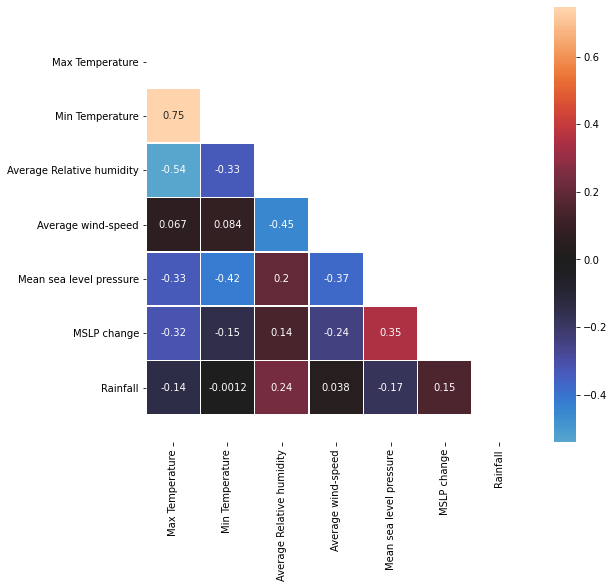

In [86]:
rainfall_stats = rainfall_stats.drop(index=rainfall_stats.index[0], 
        axis=0)
rainfall_correlation = rainfall_stats.drop(['Rainfall_Category', 'is_rain'], axis = 1)

def plt_correlation_matrix(corrs):
    '''Uses the seaborn heatmap to plot the correlation matrix of a pandas dataframe''' 
    # as this is a symmetric table, set up a mask so that we only plot values 
    # below the main diagonal
    mask = np.triu(np.ones_like(corrs, dtype=np.bool))
    f, ax = plt.subplots(figsize=(10, 8)) # initialise the plots and axes
    # plot the correlations as a seaborn heatmap, with a colourbar
    sns.heatmap(corrs, mask=mask, center=0, annot=True, square=True, linewidths=.5) 
    # do some fiddling so that the top and bottom are not obscured
    bottom, top = ax.get_ylim() 
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plt_correlation_matrix(rainfall_correlation.corr())

In [87]:
# Creates dataframe which contains information on previous day and whether it rained on this day. The date column 
# represents the date of the `Rain` feature. I.e. the date of the day we are predicting whether it rained or not.

def df_with_previous_n_days_per_row(n):
    DAYS = n # How many previous days of data to put in a single row.

    table = []
    for i in range(DAYS, len(daily)): # Each loop creates a row of the new dataframe
        # Add `Rain` and `Date`
        row = [daily.iloc[i,0], daily.iloc[i].name]
        for j in range(DAYS):
            relative_day_number = -(j+1)
            row += list(daily.iloc[i+relative_day_number,1:])
        table.append(row)

    # Creating column names
    columns = []
    for i in range(DAYS):
        relative_day_number = -(i+1)
        for name in daily.columns[1:]:
            columns.append(f"{str(relative_day_number)} {name}")

    df = pd.DataFrame(data = table, columns=["Rain","Date"]+columns).set_index("Date")
    
    # Get binary month coloumns
    df["Month"] = pd.Series(df.index, index=df.index).apply(lambda x:x.month).astype("str")
    dummies = pd.get_dummies(df.Month)
    df = df.join(dummies)
    df.drop(columns = ["Month"], inplace = True)
    
    return df

In [88]:
df_with_previous_n_days_per_row(3)

NameError: name 'daily' is not defined

In [ ]:
# SVC model 
# Kernel: determines the shape of the boundaries
# C: determines the hardness of the boundaries

X = df_2.drop(['is_rain'], axis = 1)
Y = df_2['is_rain']
 
XX = (X-X.mean())/X.std()
X_train,X_test,Y_train,Y_test=train_test_split(XX,Y,train_size=0.8,random_state=0) 

In [ ]:
df_2

In [ ]:
svc_model = SVC(class_weight='balanced', probability=True)
svc_model.fit(X_train, Y_train)
svc_predict = svc_model.predict(X_test)# check performance
print('ROCAUC score:',roc_auc_score(Y_test, svc_predict))
print('Accuracy score:',accuracy_score(Y_test, svc_predict))
print('F1 score:',f1_score(Y_test, svc_predict))
